Upload two images (query and target):


Saving querypng to querypng
Saving target.png to target.png


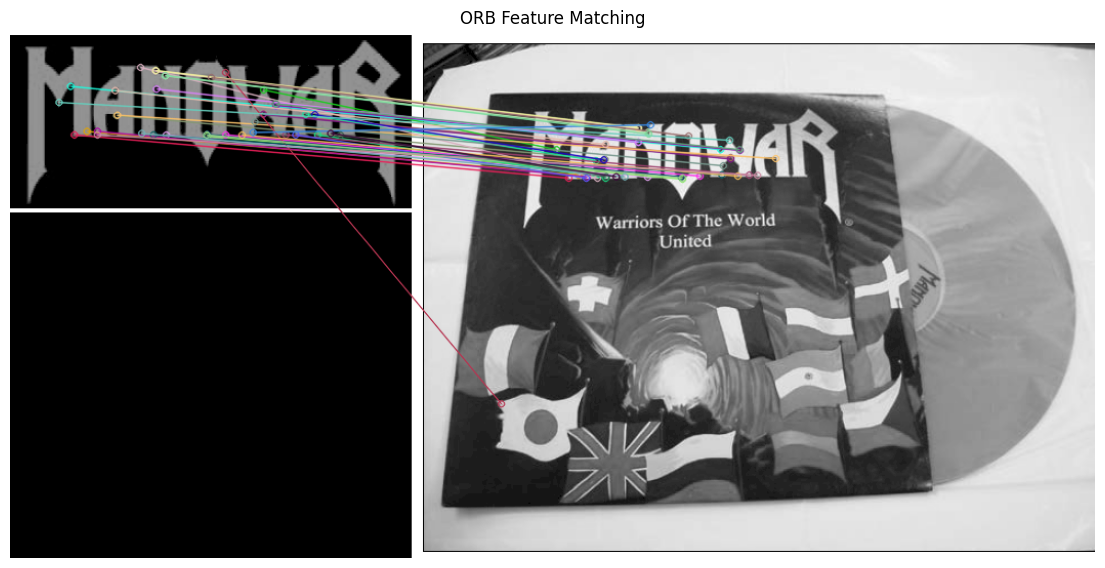

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Upload two images
print("Upload two images (query and target):")
uploaded = files.upload()

# Get file names
file_names = list(uploaded.keys())
if len(file_names) != 2:
    raise Exception("❗ Please upload exactly two images.")

# Read images as grayscale
img1 = cv2.imread(file_names[0], cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(file_names[1], cv2.IMREAD_GRAYSCALE)

# Create ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Brute-Force matcher with Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort by distance (smaller distance = better match)
matches = sorted(matches, key=lambda x: x.distance)

# Draw first 40 matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:40], None, flags=2)

# Display result
plt.figure(figsize=(14, 7))
plt.imshow(img_matches)
plt.axis("off")
plt.title("ORB Feature Matching")
plt.show()
